<a href="https://colab.research.google.com/github/saemaqazi/AFLesson8/blob/main/subplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

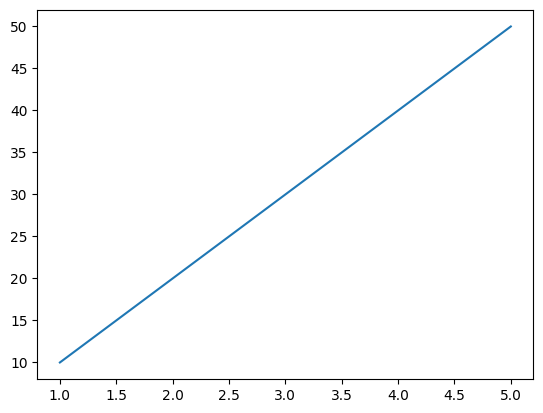

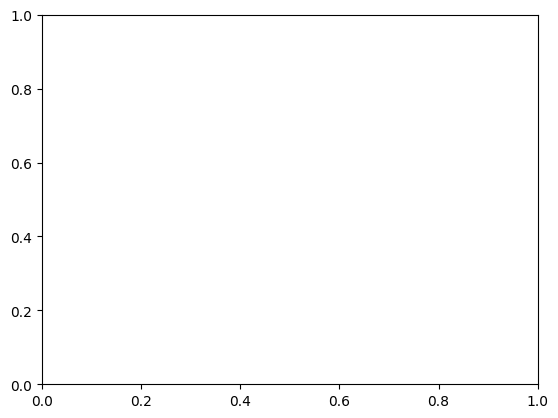

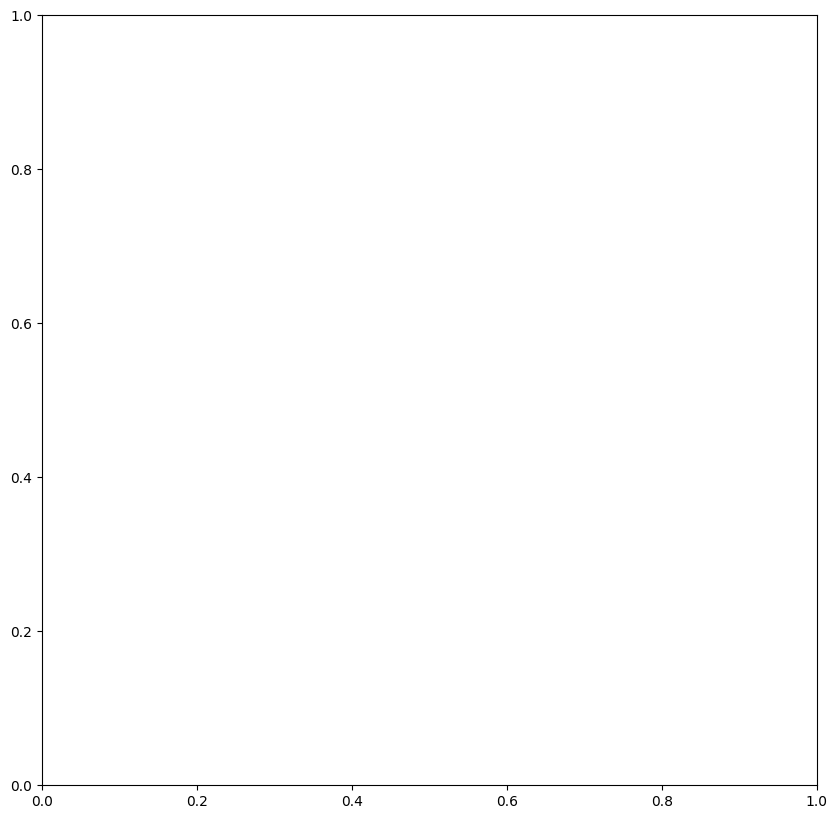

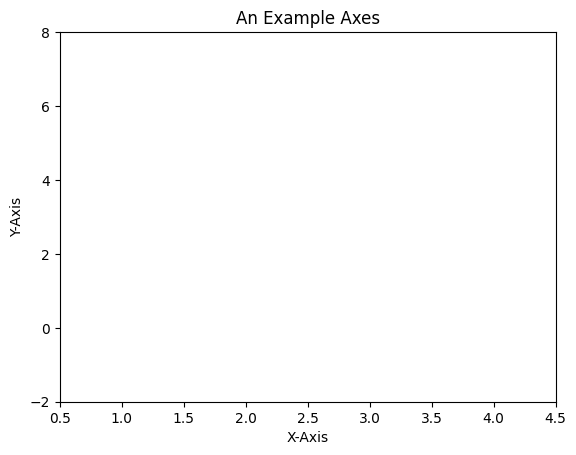

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x=[1,2,3,4,5]
y=[10,20,30,40,50]
plt.plot(x,y)
#plt.show()
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.show()
fig, ax = plt.subplots(figsize=(10,10))
plt.show()
fig,ax = plt.subplots()

ax.set(xlim=[0.5, 4.5], ylim=[-2, 8],
       title='An Example Axes',
       ylabel='Y-Axis', xlabel='X-Axis')

plt.show()

# Save a Plot to an Image File

plt.savefig("chart1.png")


In [3]:
from google.colab import files


uploaded = files.upload()



Saving covid_data.csv to covid_data.csv


In [16]:
import pandas as pd
data=pd.read_csv("titanic.csv")
print(data)
print(data.to_string())
print(pd.options.display.max_rows)
pd.options.display.max_rows=999
print(data)
#creating new columns
data["test"]=data["Fare"]+2
data["test2"]=data["Fare"]*data["Pclass"]
print(data.info())
#Renaming column names
data_renamed=data.rename(
    {
        "Pclass":"Passenger Class",
        "Sibsp":"Sibling"
    }
)
print(data_renamed.info())
#avaerage age of titanic passengers
print(data["Age"].mean())
#median age and ticket fare
print(data[["Age","Fare"]].median())

     Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0      m

In [9]:
# Data Analysis on Covid Data Set , Part - 1 (Aggregated Data)

# Open the data set in excel and explain the use of each column

# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotly is same as Matplotlib but with higher graphic standards
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

data = pd.read_csv("covid_data.csv")
data = data[['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Recovered', 'Deaths', 'Active']]
data.columns = ('State','Country','Last Update','Lat','Long','Confirmed','Recovered','Deaths','Active')
#'df.method({col: value}, inplace=True)' or df[col]
data.fillna({'State':""},inplace=True)
#data['State'].fillna(value = '', inplace = True)
# Top 10 most affected countries (Bubble Plot)

top10_confirmed = pd.DataFrame(data.groupby('Country')['Confirmed'].sum().nlargest(10).sort_values(ascending = False))
fig1 = px.scatter(top10_confirmed, x = top10_confirmed.index, y = 'Confirmed', size = 'Confirmed', size_max = 120, color = top10_confirmed.index, title = "Top 10 Countries by Confirmed Cases" )
fig1.show()
fig1.write_html('Fig1.html', auto_open=True)
# This will generate the HTML file in Repl, Download the HTML File and run it with browser (preferably chrome)

# Top 10 most affected countries (Bubble Plot)

top10_deaths = pd.DataFrame(data.groupby('Country')['Deaths'].sum().nlargest(10).sort_values(ascending = False))
fig2 = px.bar(top10_deaths, x = 'Deaths', y = top10_deaths.index, height = 600, color = 'Deaths', orientation = 'h', color_continuous_scale = ['deepskyblue','red'], title = 'Top 10 Death Cases Countries')
fig2.write_html('Fig2.html', auto_open=True)

# Top 10 recovered countries (Bar plot)

top10_recovered = pd.DataFrame(data.groupby('Country')['Recovered'].sum().nlargest(10).sort_values(ascending = False))
fig3 = px.bar(top10_recovered, x = top10_recovered.index, y = 'Recovered', height = 600, color = 'Recovered', title = 'Top 10 Recovered Cases Countries', color_continuous_scale = px.colors.sequential.Viridis)

fig3.show()
fig3.write_html('Fig3.html', auto_open=True)


# Doing the analysis
# Do the analysis for one country give the other countries as homework prefarably taking the country name by user input
# USA
topstates_us = data['Country'] == 'US'
topstates_us = data[topstates_us].nlargest(5, 'Confirmed')
# Brazil
topstates_brazil = data['Country'] == 'Brazil'
topstates_brazil = data[topstates_brazil].nlargest(5, 'Confirmed')
# India
topstates_india = data['Country'] == 'India'
topstates_india = data[topstates_india].nlargest(5, 'Confirmed')
# Russia
topstates_russia = data['Country'] == 'Russia'
topstates_russia = data[topstates_russia].nlargest(5, 'Confirmed')

# USA
fig4 = go.Figure(data = [
    go.Bar(name = 'Confirmed Cases', x = topstates_us['Confirmed'], y = topstates_us['Confirmed'], orientation = 'h'),
    go.Bar(name = 'Death Cases', x = topstates_us['Deaths'], y = topstates_us['State'], orientation = 'h')
])
fig4.update_layout(title = 'Most Affected States in USA', height = 600)
fig4.show()
fig4.write_html('Fig4.html', auto_open=True)

fig5 = go.Figure(data = [
    go.Bar(name = 'Recovered Cases', x = topstates_brazil['State'], y = topstates_brazil['Recovered']),
    go.Bar(name = 'Confirmed Cases', x = topstates_brazil['State'], y = topstates_brazil['Confirmed']),
    go.Bar(name = 'Death Cases', x = topstates_brazil['State'], y = topstates_brazil['Deaths'])
])
fig5.update_layout(title = 'Most Affected States in Brazil', barmode = 'stack', height = 600)
fig5.show()
fig5.write_html('Fig5.html', auto_open=True)#()

In [1]:
from google.colab import files


uploaded = files.upload()



Saving WHO-COVID-19-global-data.csv to WHO-COVID-19-global-data.csv


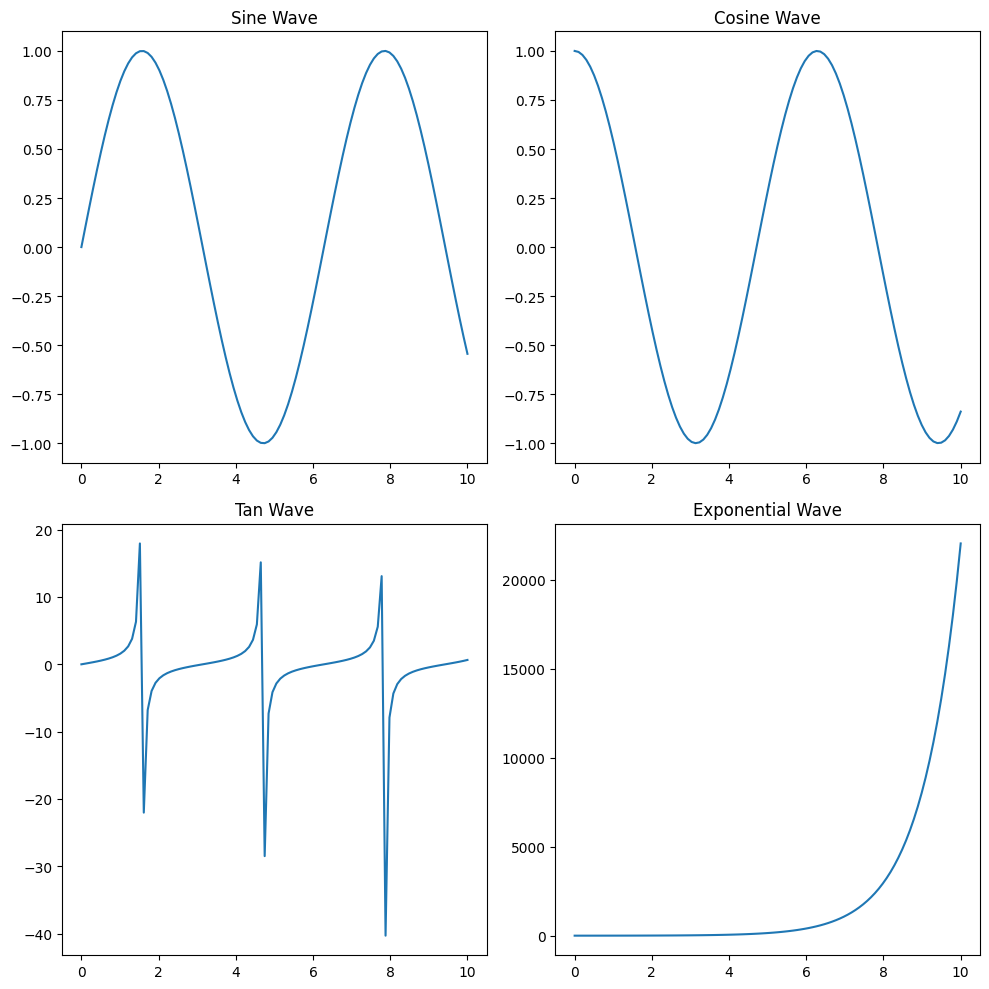

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
x=np.linspace(0,10,100)
y1=np.sin(x)
y2=np.cos(x)
y3=np.tan(x)
y4=np.exp(x)
ax1.plot(x,y1)
ax1.set_title('Sine Wave')
ax2.plot(x,y2)
ax2.set_title('Cosine Wave')
ax3.plot(x,y3)
ax3.set_title('Tan Wave')
ax4.plot(x,y4)
ax4.set_title('Exponential Wave')
plt.tight_layout()
plt.show()


In [10]:
# Data Analysis on Covid Data Set (Part - 2 Time Series Data Analysis)

# Open the data in excel and explain the data and columns data
# Explain what is time-series data, Special Emphasis on Date_reported column present

# Import the data
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotly is same as Matplotlib but with higher graphic standards
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

data = pd.read_csv("covid_data.csv")
import pandas as pd
time_series = pd.read_csv('WHO-COVID-19-global-data.csv', encoding = 'ISO-8859-1')
time_series.columns = ("Date_reported","Country_code","Country","WHO_region","New_cases","Cumulative_cases","New_deaths","Cumulative_deaths")

# Date_Reported column is string, typecast it to datatime format
time_series["Date_reported"] = pd.to_datetime(time_series["Date_reported"])

time_series_dates = time_series.groupby('Date_reported').sum()

# Plot the basic graphs below and explain the results
fig6 = go.Figure()
fig6.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['Cumulative_cases'], fill = 'tonexty', line_color = 'blue'))
fig6.update_layout(title = 'Cumulative Cases Worldwide')
fig6.show()
fig6.write_html('Fig6.html', auto_open=True)



fig7 = go.Figure()
fig7.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['Cumulative_deaths'], fill = 'tonexty', line_color = 'red'))
fig7.update_layout(title = 'Cumulative Deaths Worldwide')
fig7.show()
fig7.write_html('Fig7.html', auto_open=True)

fig8 = go.Figure()
fig8.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['New_cases'], fill = 'tonexty', line_color = 'gold'))
fig8.update_layout(title = 'Daily New Cases Worldwide')
fig8.show()
fig8.write_html('Fig8.html', auto_open=True)


fig9 = go.Figure()
fig9.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['New_deaths'], fill = 'tonexty', line_color = 'hotpink'))
fig9.update_layout(title = 'Daily Death Cases Worldwide')
fig9.write_html('Fig9.html', auto_open=True)

# Ask the student for taking a country as homework and draw the same graphs again showing the trend for the particular country as homework